In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# Reproducibility

# to Build the models
from sklearn.linear_model import Lasso

# to evaulate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


In [2]:
# load the train and test set with engineered variables

# we built and saved these datasets in the previous notebook.
# If you haven't done so, go ahead and check the previous notebooks
# to find out how to create these datasets

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')


# print(X_test)


In [3]:
print(X_test.isnull().sum())
X_test =X_test.fillna(X_test.mean())
print(X_test)

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
                 ..
SaleType          0
SaleCondition     0
LotFrontage_na    0
MasVnrArea_na     0
GarageYrBlt_na    0
Length: 81, dtype: int64
     MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0      0.750000      0.75     0.445002      0.0     1.0    1.0  0.333333   
1      0.416667      0.75     0.490408      0.0     1.0    1.0  0.000000   
2      0.416667      0.75     0.445002      0.0     1.0    1.0  0.333333   
3      1.000000      0.75     0.508690      0.0     1.0    1.0  0.000000   
4      0.333333      0.25     0.000000      0.0     1.0    1.0  0.000000   
..          ...       ...          ...      ...     ...    ...       ...   
141    0.083333      0.25     0.189077      0.0     1.0    1.0  0.000000   
142    0.750000      0.75     0.445002      0.0     1.0    1.0  0.000000   
143    0.750000      0.75     0.394699      0.0     1.0    1.0  0.33333

In [4]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,SalePrice
0,12.211
1,11.888
2,12.676
3,12.278
4,12.103


In [5]:
# load the pre-selected features
# ==============================

# we selected the features on the prevous notebook (step 3)

# if you haven't done so, go ahead and visit the previous notebook
# to find out how to select the features

features = pd.read_csv('selected_features.csv')
features = features['0'].to_list()

# display final feature set
features


['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

In [6]:
# reduced the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

In [7]:
# Regularised linear regression : Lasso

# set up the model
# remember to set the random_state / seed

lin_model = Lasso(alpha=0.001, random_state=0)

# train the model

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [8]:
# evaluate the model

# remember that we log transformed the output (SalePrice)
# in our feature engineering notebook (step 2).

# In order to get the true performance of the Lasso
# we need to transformed both the target and the predictions
# back to the original house price values

# We will evaluate performance using the mean squared error and 
# the root of the mean sqaured error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(r2_score(np.exp(y_test), np.exp(pred))))
print()


print('Average house price: ', int(np.exp(y_train).median()))


train mse: 784738485
train rmse: 28013
train r2: 0.8743287354409518

test mse: 1019864418
test rmse: 31935
test r2: 0.8515938141044387

Average house price:  163080


Text(0.5, 1.0, 'Evaluate of Lasso Predictions')

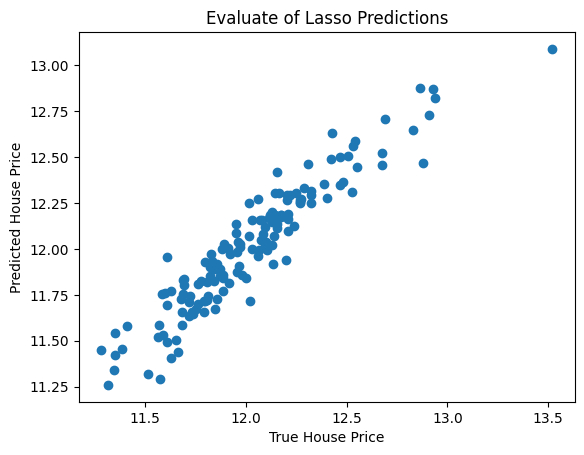

In [9]:
# let's evaluet our predictions respect to the real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluate of Lasso Predictions')

In [10]:
y_test.reset_index(drop=True)

,SalePrice
0,12.209188
1,11.798104
2,11.608236
3,12.165251
4,11.385092
...,...
141,11.884489
142,12.287653
143,11.921718
144,11.598727


In [11]:
# let's evaluate the distribution of the errors:
# they should be fairly normally distributed

y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(lin_model.predict(X_test))

preds

0      12.164512
1      11.930092
2      11.695602
3      12.304467
4      11.452986
         ...    
141    11.770376
142    12.333589
143    11.971392
144    11.760474
145    12.073084
Length: 146, dtype: float64

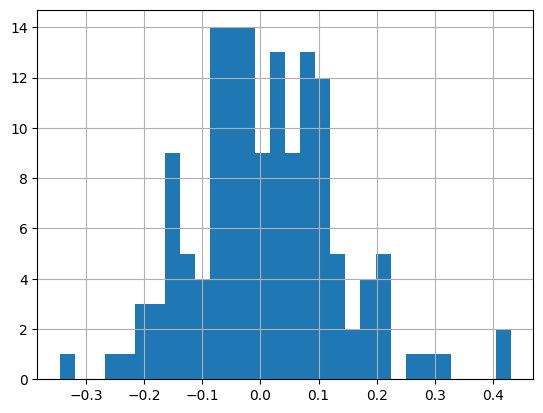

In [12]:
# lets evaluate the distribution of the errors:
# they should be fairly normally distributed

errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

Text(0.5, 1.0, 'Feature Importance')

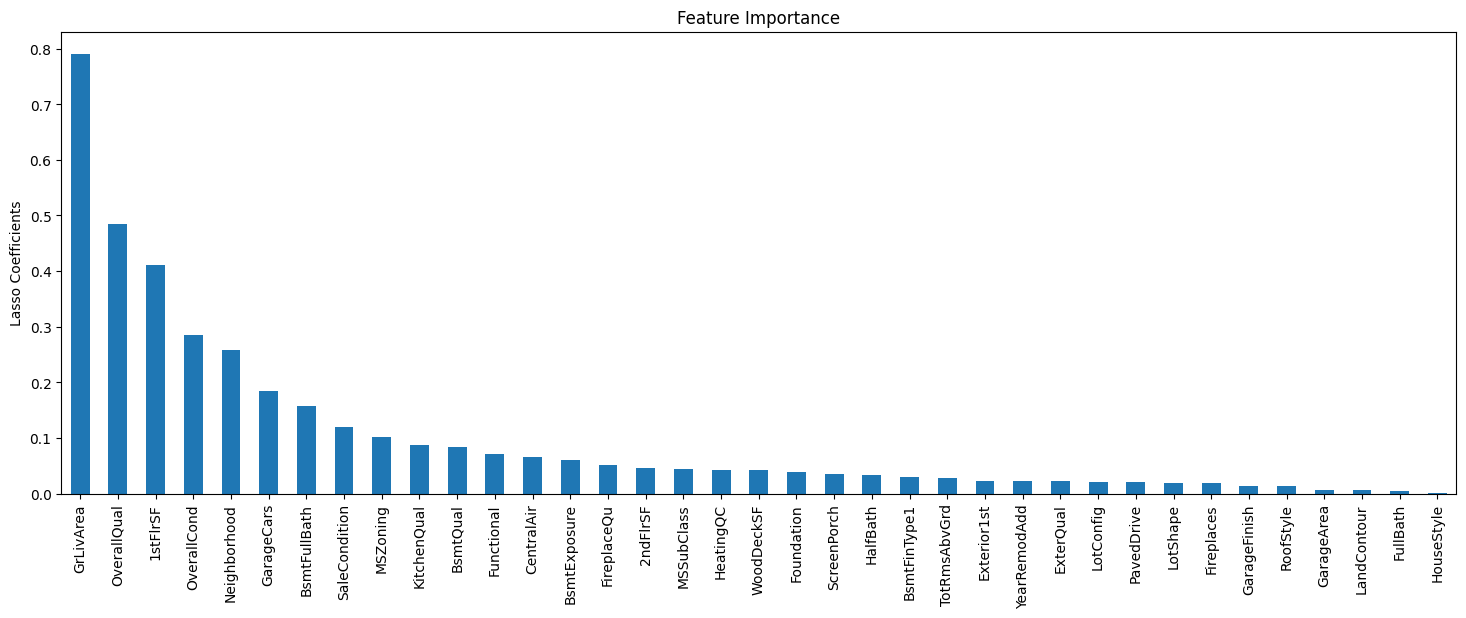

In [13]:
# Feature importance
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True,ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

In [14]:
# Save the model
# we are happy to our model, so we save it to be able
# to score new data

joblib.dump(lin_model, 'linear_regression.joblib')

['linear_regression.joblib']